Find s

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/MyDrive/ML_lab/ENJOYSPORT.csv")

def MatchHypothesis(x,h):
    flag = False
    new = [m for m in x]
    for i in range(len(x)):
        if h[i] == '#':
            new[i] = x[i]
            flag = False
        elif h[i] != x[i]:
            new[i] = '?'
            flag = False
        else:
            pass
    return flag,new

H = [
    ['#','#','#','#','#','#']
]

H_index = 0

for i in range(len(dataset)):
    x = list(dataset.iloc[i])
    if x[len(x)-1] == 1:
        x = x[:-1]
        flag,new = MatchHypothesis(x,H[H_index])
        if not flag:
            H.append(new)
            H_index += 1
print(H[H_index])

Mounted at /content/drive
['Sunny', 'Warm', '?', 'Strong', '?', '?']


Candidate Elimination Algorithm

In [2]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("/content/drive/MyDrive/ML_lab/ENJOYSPORT.csv")

def MatchSpecific(x,h):
    flag = False
    new = [m for m in x]
    for i in range(len(x)):
        if h[i] == '#':
            new[i] = x[i]
            flag = False
        elif h[i] != x[i]:
            new[i] = '?'
            flag = False
        else:
            pass
    return new

def Check(x,h):
    for i in range(len(x)):
        if h[i] == '?':
            continue
        elif x[i] != h[i]:
            return True
    return False

def MatchGeneral(x,h,s):
    # x is instance
    # h is hypothesis
    # s is specific hypothesis
    flag = False
    hypo = []
    for h1 in h:
        if Check(x,h1):
            hypo.append(h1)
            flag = True
    if flag:
        return hypo
    new = []
    for h1 in h:
        for attr in range(len(x)):
            if s[attr] == x[attr]:
                continue
            if h1[attr] == '?' and s[attr] != '?':
                temp = [m for m in h1]
                temp[attr] = s[attr]
                new.append(temp)
        return new
def MatchG(x,h):
    flag = False
    hypo = []
    for h1 in h:
        if not Check(x,h1):
            hypo.append(h1)
            flag = True
    if flag:
        return hypo

def Candidate(g,s):
    candidate = []
    candidate.append(s)
    i =[]
    for x in range(len(s)):
        if s[x] != '?':
            i.append(x)
    lst = []
    for x in i:
        temp = [m for m in s]
        temp[x] = '?'
        lst.append(temp)
    candidate.append(lst)
    candidate.append(g)
    return candidate

S = [
    ['#','#','#','#','#','#']
]
S_index = 0

G = [
    [['?','?','?','?','?','?']]
]

G_index = 0

for i in range(len(dataset)):
    x = list(dataset.iloc[i])
    if x[len(x)-1] == 1:
        x = x[:-1]
        new = MatchSpecific(x,S[S_index])
        S.append(new)
        S_index += 1
        new = MatchG(x,G[G_index])
        G.append(new)
        G_index += 1
    else:
        x = x[:-1]
        new = MatchGeneral(x,G[G_index],S[S_index])
        G.append(new)
        G_index += 1

print("Specific Hypothesis")
for x in S:
    print(x)
print("...............")
print("General Hypothesis")
for x in G:
    print(x)

print(".............")
print("Final Hypothesis")
c = Candidate(G[G_index],S[S_index])
for x in c:
    print(x)

Specific Hypothesis
['#', '#', '#', '#', '#', '#']
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', '?', 'Strong', '?', '?']
...............
General Hypothesis
[['?', '?', '?', '?', '?', '?']]
[['?', '?', '?', '?', '?', '?']]
[['?', '?', '?', '?', '?', '?']]
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'Same']]
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]
.............
Final Hypothesis
['Sunny', 'Warm', '?', 'Strong', '?', '?']
[['?', 'Warm', '?', 'Strong', '?', '?'], ['Sunny', '?', '?', 'Strong', '?', '?'], ['Sunny', 'Warm', '?', '?', '?', '?']]
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


linear regression

Equation =>  Y = 29.666666666666668*X + -95.64444444444446


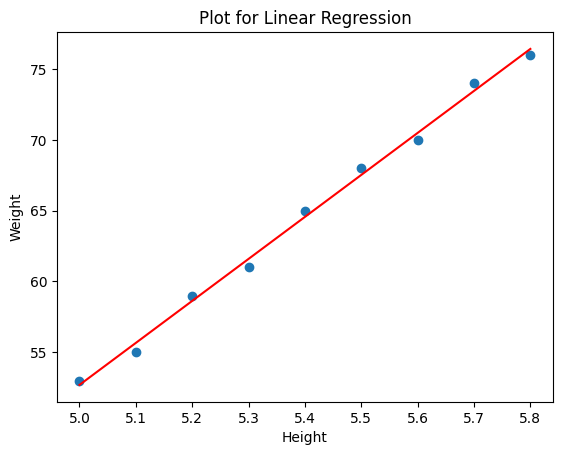

In [3]:
X = [5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8]
Y = [53,55,59,61,65,68,70,74,76]

class LR:
    def __init__(self,Xdata,Ydata):
        self.X = Xdata
        self.Y = Ydata
        self.X_ = sum(X)/len(X)
        self.Y_ = sum(Y)/len(Y)
        self.CreateW()
    def CreateW(self):
        self.w1 = 0
        self.num = 0
        self.den = 0
        for i in range(len(self.X)):
            self.num += (self.X[i] - self.X_)*(self.Y[i] - self.Y_)
            self.den += (self.X[i] - self.X_)*(self.X[i] - self.X_)
        self.w1 = self.num/self.den
        self.w0 = self.Y_ - self.w1*self.X_
    def Predict(self,X):
        return self.w1*X+self.w0
    def getw1(self):
        return self.w1
    def getw0(self):
        return self.w0
lr = LR(X,Y)
print("Equation =>  Y = {:2}*X + {:2}".format(lr.getw1(),lr.getw0()))
Predy = [lr.Predict(i) for i in X]
import matplotlib.pyplot as plt
plt.title("Plot for Linear Regression")
plt.plot(X,Predy,"r")
plt.scatter(X,Y)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

KNN

In [4]:
# Regression
import pandas as pd
import math

length = [10.0, 11.0, 12.0, 7.0, 9.0, 8.0,6.0,15.0,14.0,7.0,10.0,13.0,9.0,5.0,5.0]
weight = [15.0, 6.0 , 14.0 , 9.0 ,14.0,12.0,11.0,10.0,8.0,12.0,6.0,8.0,7.0,8.0,10.0]
cost = [45,37,48,33,38,40,35,50,46,35,36,44,32,30,30]

test = [7.0,8.0]
data = []

for i in range(len(length)):
    data.append([length[i],weight[i],cost[i]])

dataset = pd.DataFrame(data,columns=["Length","Weight","Cost"])

def Predict(dataset,test,k):
    lst = []
    for i in range(len(dataset)):
        val = math.sqrt(math.pow((dataset.iloc[i]["Length"] - test[0]),2) + math.pow((dataset.iloc[i]["Weight"] - test[1]),2))
        lst.append((val,dataset.iloc[i]["Cost"]))
    lst.sort(key=lambda x:x[0])
    cost = 0
    for i in range(k):
        cost += lst[i][1]
    return cost/k

print("Prediction of cost for length = 7 and weight = 8 is {} for k = 9".format(Predict(dataset,test,9)))

Prediction of cost for length = 7 and weight = 8 is 34.22222222222222 for k = 9


In [6]:
# Classification
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import math
data = pd.read_csv("/content/drive/MyDrive/ML_lab/Iris.csv")

Y = data['Species']
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
def Classify(dataset,target,test,k):
    lst = []
    for i in range(len(dataset)):
        val = math.sqrt(math.pow((dataset.iloc[i]["SepalLengthCm"] - test["SepalLengthCm"]),2) + math.pow((dataset.iloc[i]["SepalWidthCm"] - test["SepalWidthCm"]),2) + math.pow((dataset.iloc[i]["PetalLengthCm"] - test["PetalLengthCm"]),2) + math.pow((dataset.iloc[i]["PetalWidthCm"] - test["PetalWidthCm"]),2))
        lst.append((val,target.iloc[i]))
    lst.sort(key=lambda x:x[0])
    isan = 0
    ivp = 0
    iver = 0
    for i in range(k):
        if lst[i][1] == "Iris-setosa":
            isan +=1
        elif lst[i][1] == "Iris-versicolor":
            ivp +=1
        else:
            iver += 1

    if isan >= ivp and isan >= iver:
        return "Iris-setosa"
    elif ivp >= isan and ivp >= iver:
        return "Iris-versicolor"
    else:
        return "Iris-virginica"

y_pred = []
for x in range(len(X_test)):
    y_pred.append(Classify(X_train,y_train,X_test.iloc[x],3))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100 :.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 95.56%
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
[[17  0  0]
 [ 0 12  2]
 [ 0  0 14]]


Decision Tree

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from collections import Counter
data = pd.read_csv('/content/drive/MyDrive/AI/tennis.csv')
import math
def Entropy_dataset(data):
    totalValues = data.shape[0]
    values = Counter(data['play'].tolist())
    ans = 0
    for x in values.values():
        ans -= (x/totalValues) * math.log(x/totalValues,2)
    return ans,values

def Entropy(data,attribute=-1):
    totalValues = data.shape[0]
    values = Counter(data[attribute].tolist())
    lst = []
    for x,y in values.items():
        filter = data[data[attribute] == x]
        filterdata = Counter(filter['play'].tolist())
        ans = 0
        for m in filterdata.values():
            ans -= (m/y) * math.log(m/y,2)
        lst.append((x,y,ans))
    ans = 0
    #print(lst)
    for x,y,z in lst:
        ans -= (y/totalValues) * z
    return ans,lst,values
def Gain(data,attribute):
    v1,val = Entropy_dataset(data)
    v2,lst,val = Entropy(data,attribute)
    return v1 + v2
def FindRoot(data,classification):
    attributes = data.columns.tolist()
    attributes.remove(classification)
    lst = []
    for x in attributes:
        lst.append((x,Gain(data,x)))
    lst.sort(key = lambda x:x[1],reverse = True)
    return lst[0]

e,val = Entropy_dataset(data)
print(val)
print("Entropy of entire dataset = ",e)

e,lst,val = Entropy(data,'outlook')
print("-- Outlook --")
for x in lst:
    print(" * ",x)
print("Entropy of outlook = ",e)
print()
e,lst,val = Entropy(data,'temp')
print("-- Temp --")
for x in lst:
    print(" * ",x)
print("Entropy of Temp = ",e)
print()
e,lst,val = Entropy(data,'humidity')
print("-- Humidity --")
for x in lst:
    print(" * ",x)
print("Entropy of humidity = ",e)
print()
e,lst,val = Entropy(data,'windy')
print("-- Windy --")
for x in lst:
    print(" * ",x)
print("Entropy of windy = ",e)



g = Gain(data,'outlook')
print("Gain of outlook = ",g)
g = Gain(data,'temp')
print("Gain of temp = ",g)
g = Gain(data,'humidity')
print("Gain of humidity = ",g)
g = Gain(data,'windy')
print("Gain of windy = ",g)


root = FindRoot(data,'play')
print("Root = ",root[0])
print("Gain of root = ",root[1])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Counter({'yes': 9, 'no': 5})
Entropy of entire dataset =  0.9402859586706309
-- Outlook --
 *  ('sunny', 5, 0.9709505944546686)
 *  ('overcast', 4, 0.0)
 *  ('rainy', 5, 0.9709505944546686)
Entropy of outlook =  -0.6935361388961918

-- Temp --
 *  ('hot', 4, 1.0)
 *  ('mild', 6, 0.9182958340544896)
 *  ('cool', 4, 0.8112781244591328)
Entropy of Temp =  -0.9110633930116763

-- Humidity --
 *  ('high', 7, 0.9852281360342516)
 *  ('normal', 7, 0.5916727785823275)
Entropy of humidity =  -0.7884504573082896

-- Windy --
 *  (False, 8, 0.8112781244591328)
 *  (True, 6, 1.0)
Entropy of windy =  -0.8921589282623617
Gain of outlook =  0.2467498197744391
Gain of temp =  0.029222565658954647
Gain of humidity =  0.15183550136234136
Gain of windy =  0.04812703040826927
Root =  outlook
Gain of root =  0.2467498197744391


Perceptron

In [8]:
import pandas as pd
class Gate:
    def __init__(self,data,epoch,lr):
        self.lr = lr;
        self.w = [0.0,0.0,0.0]
        self.epochs = epoch
        self.know = pd.DataFrame(data)
        self.w = self.Train(self.know,self.w,self.epochs,self.lr)
    def Train(self,data,w,epoch,lr):
        for y in range(epoch):
            for x in range(len(self.know)):
                # Finding Output of the input
                net = data.iloc[x][0]*w[0] + data.iloc[x][1]*w[1] + data.iloc[x][2]*w[2]
                # finding the output
                o = 1 if net > 0 else -1
                # finding the difference between generated and actual output
                w0 = data.iloc[x][2] - o
                # Assigning new weights
                nw = [lr*data.iloc[x][0]*w0 , lr*data.iloc[x][1]*w0 , lr*w0]
                # Updating orignal weights
                w[0] += nw[0]
                w[1] += nw[1]
                w[2] -= nw[2]
        return w
    def predict(self,inp1,inp2):
        temp = self.w[0]*inp1 + self.w[1]*inp2
        if temp <= self.w[2]:
            return -1
        else:
            return 1
# And gate
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
data = {
    "x1":[1,1,-1,-1],
    "x2":[1,-1,1,-1],
    "out":[1,-1,-1,-1]
}
MyGate = Gate(data,10,0.05)

print("Output for -1,-1 : ",MyGate.predict(-1,-1))
print("Output for 1,-1 : ",MyGate.predict(1,-1))
print("Output for -1,1 : ",MyGate.predict(-1,1))
print("Output for 1,1 : ",MyGate.predict(1,1))

print("Weights = ",MyGate.w)

Output for -1,-1 :  -1
Output for 1,-1 :  -1
Output for -1,1 :  -1
Output for 1,1 :  1
Weights =  [0.1, 0.1, 0.1]


Neive bayes

In [9]:
from collections import Counter
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/AI/tennis.csv")

def createTables(data):
    out = Counter(data['play'].tolist())
    dic = {}
    c = data.columns.tolist()
    c.remove('play')
    for x in c:
        dic[x] = dict()
        values = Counter(data[x].tolist())
        for y in values:
            if x == 'windy':
                dic[x][y] = dict()
                dic[x][y]['yes'] = len(data.query("{} == {} and play == \"yes\"".format(x,y)))/out['yes']
                dic[x][y]['no'] = len(data.query("{} == {} and play == \"no\"".format(x,y)))/ out['no']

            else:
                dic[x][y] = dict()
                dic[x][y]['yes'] = len(data.query("{} == \"{}\" and play == \"yes\"".format(x,y)))/out['yes']
                dic[x][y]['no'] = len(data.query("{} == \"{}\" and play == \"no\"".format(x,y))) /out['no']
    dic['play'] = dict()
    dic['play']['yes']= out['yes']/(out['yes'] + out['no'])
    dic['play']['no']= out['no']/(out['yes'] + out['no'])
    return dic
def predict(columns,dic,values):
    sumy = 1
    sumn = 1
    for x in range(len(columns)-1):
        sumy *= dic[columns[x]][values[x]]['yes']
        sumn *= dic[columns[x]][values[x]]['no']
    sumy *=  dic['play']['yes']
    sumn *=  dic['play']['no']
    print("Prosterior probablity of yes = ",sumy)
    print("Prosterior probablity of no = ",sumn)
    print("probablity of yes = ",sumy/(sumy+sumn))
    print("probablity of no = ",sumn/(sumn+sumy))
    print("Total = ",sumy/(sumy+sumn) +sumn/(sumn+sumy) )
    return "Yes" if sumy/(sumy+sumn) > sumn/(sumn+sumy) else "NO"

table = createTables(data)
for x in table:
    print(x,table[x])
p = ['rainy','mild', 'normal', True]
predict(data.columns,table,p)

outlook {'sunny': {'yes': 0.2222222222222222, 'no': 0.6}, 'overcast': {'yes': 0.4444444444444444, 'no': 0.0}, 'rainy': {'yes': 0.3333333333333333, 'no': 0.4}}
temp {'hot': {'yes': 0.2222222222222222, 'no': 0.4}, 'mild': {'yes': 0.4444444444444444, 'no': 0.4}, 'cool': {'yes': 0.3333333333333333, 'no': 0.2}}
humidity {'high': {'yes': 0.3333333333333333, 'no': 0.8}, 'normal': {'yes': 0.6666666666666666, 'no': 0.2}}
windy {False: {'yes': 0.6666666666666666, 'no': 0.4}, True: {'yes': 0.3333333333333333, 'no': 0.6}}
play {'yes': 0.6428571428571429, 'no': 0.35714285714285715}
Prosterior probablity of yes =  0.021164021164021163
Prosterior probablity of no =  0.006857142857142859
probablity of yes =  0.755287009063444
probablity of no =  0.24471299093655596
Total =  1.0


'Yes'